# K Means

Assumptions:
* the variance of the distribution of each attribute (variable) is spherical
* all variables have the same variance
* each cluster has roughly equal number of observations

Parameter selection:
* n_clusters: number of clusters to be found. The optimal number can be determined with the "elbow method".
* The remaining parameters are left by default.

Returns (attributes):
* cluster_centers_: ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. 

* labels_: ndarray of shape (n_samples,) The labels of each point, can be used to count the number of clusters or visualize their names.

* inertia_: float. Sum of squared distances of samples to their closest cluster center. Used to calculate the "elbow" value

* n_iter_: int. Number of iterations run.

In [1]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = '/Users/andrewbailey/PycharmProjects/read_clustering/tests/test_files/native_cbf5_gal.csv'

native = VariantCall(path)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
list_18 = native.get_contig_positions('RDN18-1')
list_25 = native.get_contig_positions('RDN25-1')

# Determine n_clusters

*The elbow method*
* Runs k-means on the dataset for a given number (a range K) of possible clusters, and for each value of K it calculates the average distance (the "sum of squared distances: SSE") from the points in each cluster to the corresponding center.
* SSE tends to be lower as the number of K increases, and when it is visualized there is often an 'inflection' point in the descending curve.
* Low SSE is desirable to have defined clusters.
* The inflection is the point with a small value of k that still has a low SSE, where we start to have diminishing returns by increasing k.

The Yellowbrick visualization for the elbow method shows a dashed line at the optimal number of clusters. The number corresponds to the 'elbowatk' value. The green dashed line shows the time taken to run kmeans with each k number.

The second scatter plot is clustered with the given k number for clusters using the Yellowbrick function.

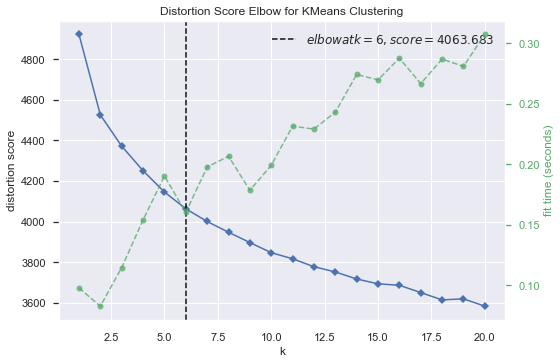

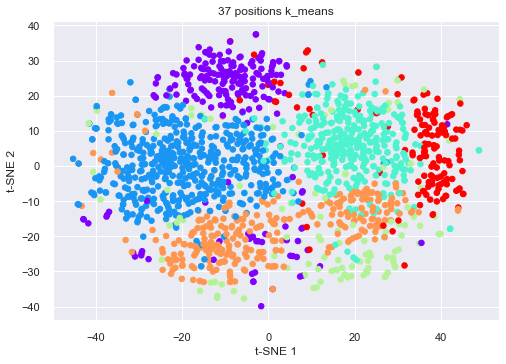

In [3]:
native.plot_tSNE_reads_covering_positions_data(list_18, 'k_means', max_number_clusters=20, find_optimal=True) 

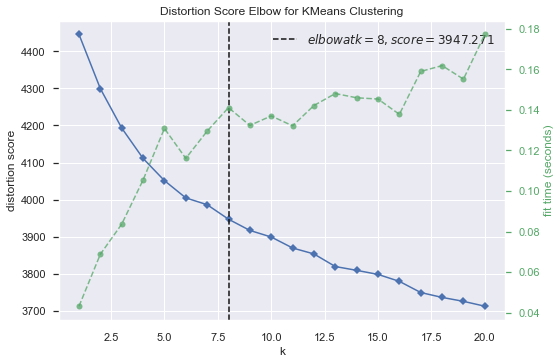

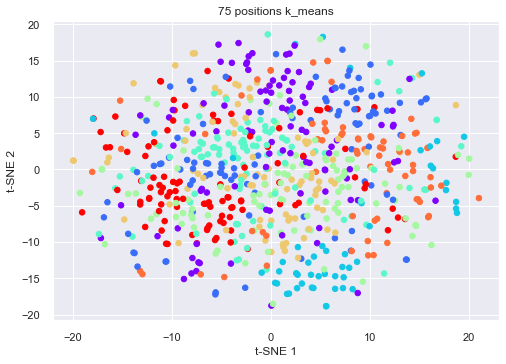

In [4]:
native.plot_tSNE_reads_covering_positions_data(list_25, 'k_means', max_number_clusters=20, find_optimal=True) 